## <span style="color:gold">Analise dos concursos da **mega sena** e **mega sena da virada**: Valores💲, Dezenas sorteadas🔢, Ganhadores🤑</span>

### <span style="color:DeepSkyBlue">Importando as libs.</span>

In [50]:
# Importando libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### <span style="color:DeepSkyBlue">Importando o dataset.</span>

In [51]:
# importando o dataset
mega_sena = pd.read_csv("sorteios.csv")
mega_sena.tail()

,Id,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,...,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada,Unnamed: 22
2273,2274,2058,11/07/2018,19,4,23,29,59,56,"42.911.631,00",...,"0,00",81,"30.543,83",5435,"650,29",SIM,"31.279.809,85","34.000.000,00","36.707.938,23",NaN
2274,2275,2059,14/07/2018,5,4,36,56,40,44,"53.294.356,50",...,"0,00",77,"39.904,70",5562,"789,19",SIM,"49.363.979,62","56.000.000,00","37.516.533,48",NaN
2275,2276,2060,18/07/2018,11,39,41,9,25,8,"62.764.250,50",...,"0,00",186,"19.455,08",8570,"603,20",SIM,"56.029.903,37","62.000.000,00","38.468.808,32",NaN
2276,2277,2061,21/07/2018,33,45,44,40,36,54,"73.680.040,00",...,"0,00",93,"45.677,31",6899,"879,62",SIM,"63.855.146,65","72.000.000,00","39.586.700,23",NaN
2277,2278,2062,25/07/2018,8,15,34,25,10,23,"90.343.582,00",...,"73.450.153,75",192,"27.128,74",13804,"539,04",NÃO,"0,00","3.000.000,00","40.957.415,53",NaN


### <span style="color:DeepSkyBlue">Algumas informações sobre linhas e colunas do arquivo.</span>

In [52]:
# Tamanho do arquivo:
l = mega_sena.shape[0]
c = mega_sena.shape[1]
print("Existem",l,"linhas neste dataset," + " com",c,"colunas.")

Existem 2278 linhas neste dataset, com 23 colunas.


### <span style="color:DeepSkyBlue">Confirguração do dataset.</span>

In [53]:
# Informações sobre o dataset
mega_sena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2278 non-null   int64  
 1   Concurso                  2278 non-null   int64  
 2   Data Sorteio              2278 non-null   object 
 3   1ª Dezena                 2278 non-null   int64  
 4   2ª Dezena                 2278 non-null   int64  
 5   3ª Dezena                 2278 non-null   int64  
 6   4ª Dezena                 2278 non-null   int64  
 7   5ª Dezena                 2278 non-null   int64  
 8   6ª Dezena                 2278 non-null   int64  
 9   Arrecadacao_Total         2278 non-null   object 
 10  Ganhadores_Sena           2278 non-null   int64  
 11  Cidade                    392 non-null    object 
 12  UF                        678 non-null    object 
 13  Rateio_Sena               2278 non-null   object 
 14  Ganhador

### <span style="color:DeepSkyBlue">Drop em colunas, deletando os duplicados, ajustando o tipo datetime e reconfigurando o index.</span>

In [54]:
# Irei apagar a ultima coluna(22) pois a msm esta "vazia" e não sera interessante para o futuro.
mega_sena = mega_sena.drop("Unnamed: 22", axis = 1)
mega_sena = mega_sena.drop('Id', axis=1)

In [55]:
# Imprimir o dataset atualizada.
mega_sena.head(5)

,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,...,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1,11/03/1996,41,5,4,52,30,33,"0,00",0,...,NaN,"0,00",17,"39.158,92",2016,"330,21",SIM,"1.714.650,23","0,00","0,00"
1,2,18/03/1996,9,39,37,49,43,41,"0,00",1,...,PR,"2.307.162,23",65,"14.424,02",4488,"208,91",NÃO,"0,00","0,00","0,00"
2,3,25/03/1996,36,30,10,11,29,47,"0,00",2,...,RN,"391.192,51",62,"10.515,93",4261,"153,01",NÃO,"0,00","0,00","0,00"
3,3,25/03/1996,36,30,10,11,29,47,"0,00",2,...,SP,"391.192,51",62,"10.515,93",4261,"153,01",NÃO,"0,00","0,00","0,00"
4,4,01/04/1996,6,59,42,27,1,5,"0,00",0,...,NaN,"0,00",39,"15.322,24",3311,"180,48",SIM,"717.080,75","0,00","0,00"


In [56]:
# Contando os registros duplicados e deletando-os da base.
mega_sena.duplicated().sum()
mega_sena.drop_duplicates(inplace = True)
l = mega_sena.shape[0]
c = mega_sena.shape[1]
print("Existem",l,"linhas neste dataset," + " com",c,"colunas.")

Existem 2241 linhas neste dataset, com 21 colunas.


In [57]:
# Transformando o formato de data que esta como objeto para datetime, usando a função iLoc(), que futuramente ira facilitar uma analise como timeseries.
mega_sena['data_convertida'] = mega_sena.iloc[:,1]
mega_sena.data_convertida = pd.to_datetime(mega_sena.data_convertida)

#Transformando a data para o padrão BR e dividindo em colunas separads DD/MM/AAAA
mega_sena['Dia'] = mega_sena.data_convertida.dt.day
mega_sena['Mês'] = mega_sena.data_convertida.dt.month 
mega_sena['Ano'] = mega_sena.data_convertida.dt.year

C:\Users\odair\AppData\Local\Temp\ipykernel_10552\1685012327.py:3: UserWarning: Parsing '18/03/1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mega_sena.data_convertida = pd.to_datetime(mega_sena.data_convertida)
C:\Users\odair\AppData\Local\Temp\ipykernel_10552\1685012327.py:3: UserWarning: Parsing '25/03/1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mega_sena.data_convertida = pd.to_datetime(mega_sena.data_convertida)
C:\Users\odair\AppData\Local\Temp\ipykernel_10552\1685012327.py:3: UserWarning: Parsing '15/04/1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mega_sena.data_convertida = pd.to_datetime(mega_sena.data_convertida)
C:\Users\odair\AppData\Local\Temp\ipykernel_10552\1685012327.py:3: UserWarning: Parsing '22/04/1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for cons

In [58]:
# Colocar a coluna "Ano" como index do dataset.
mega_sena.set_index("Ano")

,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,...,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada,data_convertida,Dia,Mês
Ano,,,,,,,,,,,,,,,,,,,,,
1996,1,11/03/1996,41,5,4,52,30,33,"0,00",0,...,"39.158,92",2016,"330,21",SIM,"1.714.650,23","0,00","0,00",1996-11-03,3,11
1996,2,18/03/1996,9,39,37,49,43,41,"0,00",1,...,"14.424,02",4488,"208,91",NÃO,"0,00","0,00","0,00",1996-03-18,18,3
1996,3,25/03/1996,36,30,10,11,29,47,"0,00",2,...,"10.515,93",4261,"153,01",NÃO,"0,00","0,00","0,00",1996-03-25,25,3
1996,3,25/03/1996,36,30,10,11,29,47,"0,00",2,...,"10.515,93",4261,"153,01",NÃO,"0,00","0,00","0,00",1996-03-25,25,3
1996,4,01/04/1996,6,59,42,27,1,5,"0,00",0,...,"15.322,24",3311,"180,48",SIM,"717.080,75","0,00","0,00",1996-01-04,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2058,11/07/2018,19,4,23,29,59,56,"42.911.631,00",0,...,"30.543,83",5435,"650,29",SIM,"31.279.809,85","34.000.000,00","36.707.938,23",2018-11-07,7,11
2018,2059,14/07/2018,5,4,36,56,40,44,"53.294.356,50",0,...,"39.904,70",5562,"789,19",SIM,"49.363.979,62","56.000.000,00","37.516.533,48",2018-07-14,14,7
2018,2060,18/07/2018,11,39,41,9,25,8,"62.764.250,50",0,...,"19.455,08",8570,"603,20",SIM,"56.029.903,37","62.000.000,00","38.468.808,32",2018-07-18,18,7


In [59]:
# Transformar colunas Arrecadacao_Total ,Rateio_Sena ,Rateio_Quina ,Rateio_Quadra ,Valor_Acumulado que estão como objeto para int64, para facilitar analises futuras.

Formatar = ['Arrecadacao_Total','Rateio_Sena','Rateio_Quina','Rateio_Quadra','Valor_Acumulado']

for col in Formatar:
    mega_sena[col] = mega_sena[col].str.replace(".", "",regex=True).str.replace(",", ".")
    

mega_sena[Formatar] = mega_sena[Formatar].fillna(0).astype(float)
assert mega_sena[Formatar].dtypes.all() == np.float64
mega_sena.dtypes

C:\Users\odair\AppData\Local\Temp\ipykernel_10552\1409241087.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  assert mega_sena[Formatar].dtypes.all() == np.float64


AssertionError: 

### <span style="color:DeepSkyBlue">Media de ganhadores a cada mes de ano.</span>

In [60]:
# Descrição de ganhadores nos meses do ano.
mega_sena.groupby('Mês')['Ganhadores_Sena'].describe()

,count,mean,std,min,25%,50%,75%,max
Mês,,,,,,,,
1,184.0,0.902174,2.710271,0.0,0.0,0.0,1.0,15.0
2,157.0,0.363057,0.793829,0.0,0.0,0.0,0.0,4.0
3,195.0,0.533333,0.857151,0.0,0.0,0.0,1.0,3.0
4,191.0,0.769634,1.548962,0.0,0.0,0.0,1.0,7.0
5,195.0,0.605128,1.031951,0.0,0.0,0.0,1.0,4.0
6,185.0,0.443243,0.954549,0.0,0.0,0.0,0.0,4.0
7,182.0,0.368132,0.666214,0.0,0.0,0.0,1.0,3.0
8,189.0,0.423280,0.978866,0.0,0.0,0.0,0.0,5.0
9,179.0,0.379888,0.764991,0.0,0.0,0.0,0.5,4.0


### <span style="color:DeepSkyBlue">Concurso com maiores numeros de ganhadores.</span>

In [61]:
# Concurso com o maior numero de ganhadores.
mega_sena.nlargest(1, 'Ganhadores_Sena')[["Concurso", "Ano", "Data Sorteio","Estimativa_Prêmio", "1ª Dezena", "2ª Dezena", "3ª Dezena", "4ª Dezena", "5ª Dezena", "6ª Dezena", 
"Ganhadores_Sena", "Rateio_Sena"]]

,Concurso,Ano,Data Sorteio,Estimativa_Prêmio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Ganhadores_Sena,Rateio_Sena
2190,2000,2017,31/12/2017,"2.000.000,00",6,37,34,10,3,17,17,18042279.04


### <span style="color:DeepSkyBlue">Concurso com as 10 maiores estimativa de premio.</span>

In [62]:
# Concurso com as 10 maiores estimativa de premio.
mega_sena.sort_values('Estimativa_Prêmio', ascending= False).iloc[:10][["Concurso", "Ano", "Data Sorteio", "1ª Dezena", "2ª Dezena", "3ª Dezena", "4ª Dezena", "5ª Dezena", "6ª Dezena", "Estimativa_Prêmio"]]

,Concurso,Ano,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Estimativa_Prêmio
2110,1923,2017,22/04/2017,46,34,59,45,9,42,"97.000.000,00"
2140,1951,2017,22/07/2017,55,14,16,21,33,19,"90.000.000,00"
1984,1809,2016,16/04/2016,23,12,54,46,9,24,"90.000.000,00"
2062,1883,2016,07/12/2016,28,59,16,47,27,60,"9.600.000,00"
1297,1198,2010,21/07/2010,29,22,36,58,41,48,"9.500.000,00"
1474,1354,2012,14/01/2012,2,42,8,49,48,38,"9.500.000,00"
2259,2047,2018,06/06/2018,18,19,44,54,1,29,"9.500.000,00"
1665,1523,2013,21/08/2013,25,39,44,41,31,22,"9.500.000,00"
1712,1564,2014,11/01/2014,54,44,38,25,46,53,"9.000.000,00"
1513,1387,2012,09/05/2012,43,27,18,52,50,32,"9.000.000,00"


### <span style="color:DeepSkyBlue">Concurso da Mega sena com os 10 maiores premios acumulados.</span>

In [63]:
# Concurso da Mega sena com os 10 maiores premios acumulados.
mega_sena.sort_values('Acumulado_Mega_da_Virada', ascending = False).iloc[1:11][["Concurso", "Ano", "Data Sorteio", "1ª Dezena", "2ª Dezena", "3ª Dezena", "4ª Dezena", "5ª Dezena", "6ª Dezena",
 "Acumulado_Mega_da_Virada"]]

,Concurso,Ano,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Acumulado_Mega_da_Virada
1941,1773,2015,24/12/2015,45,41,39,30,15,59,"97.307.274,17"
1940,1772,2015,22/12/2015,27,39,19,41,12,45,"96.785.146,44"
1939,1772,2015,22/12/2015,27,39,19,41,12,45,"96.785.146,44"
1938,1771,2015,19/12/2015,38,2,27,28,32,20,"95.412.469,00"
1937,1770,2015,16/12/2015,34,30,41,11,27,26,"93.732.670,74"
1936,1769,2015,12/12/2015,32,44,54,60,47,37,"92.117.520,71"
1935,1768,2015,09/12/2015,35,11,7,50,34,5,"90.612.696,97"
1102,1021,2008,12/11/2008,42,55,51,43,2,33,"9.928.095,69"
1254,1159,2010,06/03/2010,53,46,5,6,34,55,"9.905.576,66"
1141,1059,2009,25/03/2009,37,1,14,45,12,16,"9.899.480,38"


## <span style="color:PaleGreen">Visualizações</span>

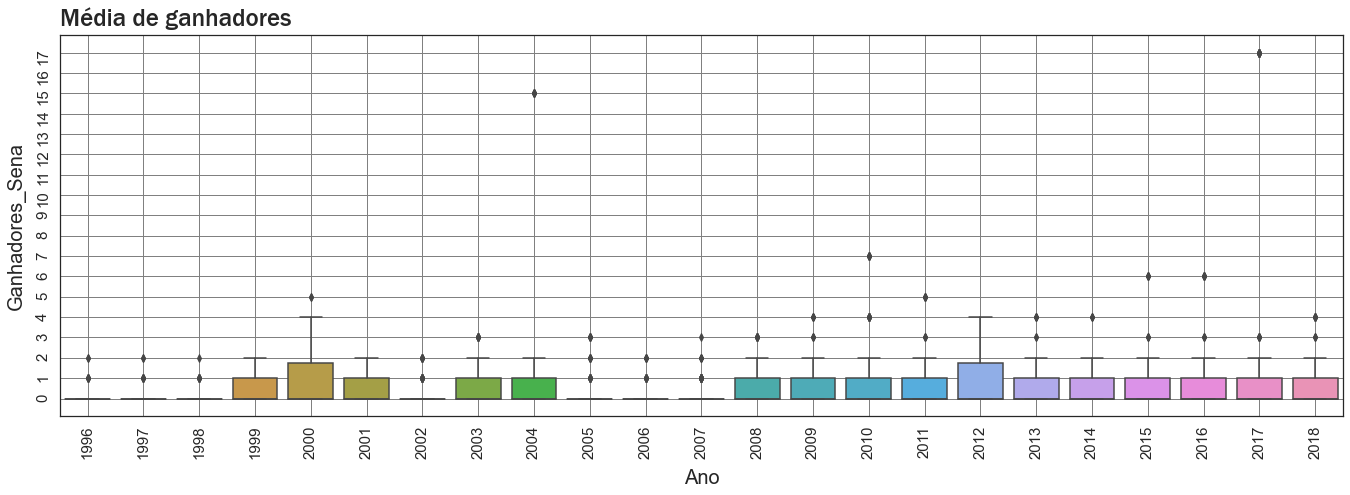

In [64]:
# Média de ganhadores x Ano.
plt.figure(figsize = (23,7))
#sns.boxplot(mega_sena['Ano'], mega_sena['Ganhadores_Sena']) #versao trabalho.
sns.boxplot(mega_sena, x = "Ano", y = "Ganhadores_Sena") #versao de casa.
plt.title("Média de ganhadores", fontname = 'Franklin Gothic Medium', size = 25, loc = 'left', pad = 10)
plt.xlabel ("Ano", size = 20, labelpad = 10)
plt.ylabel ("Ganhadores_Sena", size = 20, labelpad =10)
plt.xticks(rotation = 90, size = 15)
plt.yticks(rotation = 90, size = 15)
sns.set(style = "white")
plt.locator_params(axis = "y", nbins = 20)
plt.grid(True, color = 'grey')
plt.show()

### <span style="color:DeepSkyBlue">Em 2004, 15 ganhadores e em 2017, 17 ganhadores como podemos verificar nos outliers.</span>

<Figure size 1440x504 with 0 Axes>

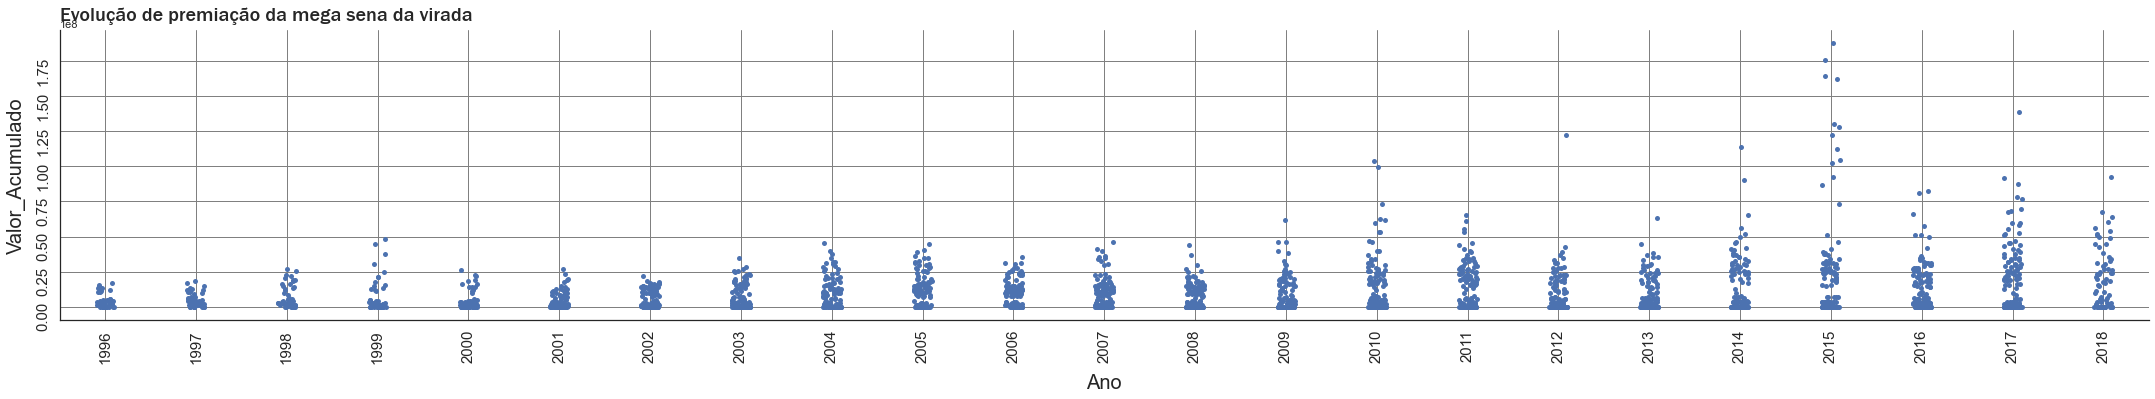

In [65]:
# Evolução de premiação da mega sena da virada
plt.figure(figsize = (20,7))
sns.catplot(data = mega_sena, x = 'Ano', y ='Valor_Acumulado', height = 5, aspect = 6)
plt.grid(True, color = 'grey')
plt.title('Evolução de premiação da mega sena da virada', fontname = 'Franklin Gothic Medium', size = 20, loc = 'left', pad = 10)
plt.xlabel ("Ano", size = 20, labelpad = 10)
plt.ylabel ("Valor_Acumulado", size = 20, labelpad =10)
plt.xticks(rotation = 90, size = 15)
plt.yticks(rotation = 90, size = 15)
sns.set(style = "white")
plt.grid(True, color = 'grey')

### <span style="color:DeepSkyBlue">Houve um aumento no valor acumulado dos prêmios da Mega-Sena da virada ao longo dos anos desde 1995.</span>

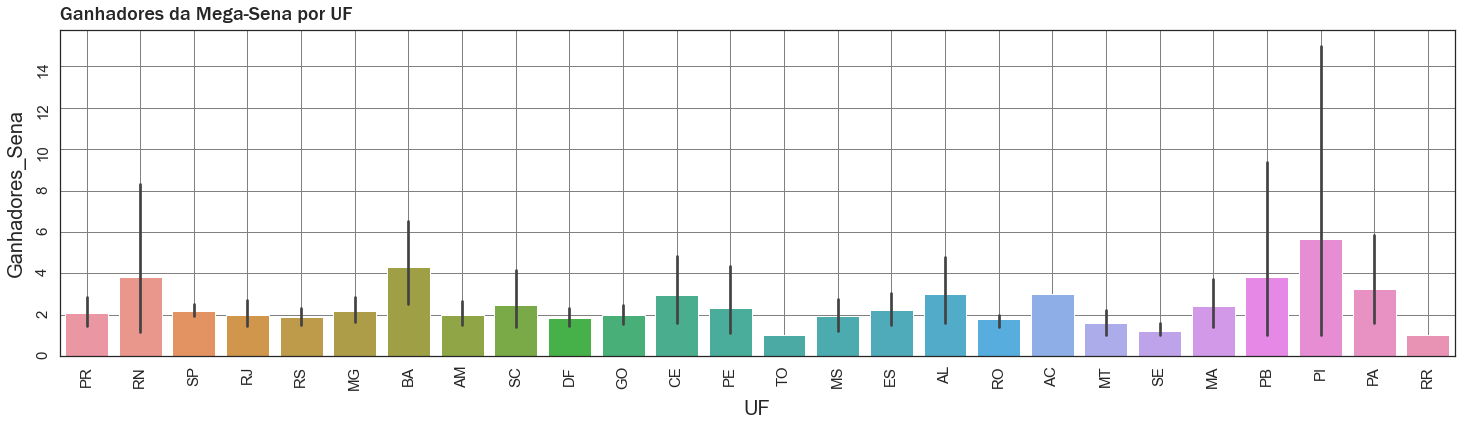

In [66]:
# Ganhadores da Mega-Sena por UF
plt.figure(figsize = (25,6))
plt.title('Ganhadores da Mega-Sena por UF', fontname = 'Franklin Gothic Medium', size = 20, loc = 'left', pad = 10)
plt.xlabel ("UF", size = 20, labelpad = 10)
plt.ylabel ("Ganhadores_Sena", size = 20, labelpad =10)
plt.xticks(rotation = 90, size = 15)
plt.yticks(rotation = 90, size = 15)
sns.barplot(x = "UF", y = "Ganhadores_Sena", data = mega_sena);
plt.grid(True, color = 'grey')

### <span style="color:DeepSkyBlue">Dois Estados se destacam por terem menos ganhadores, o TO e RR e os demais acima de 7 ganhadores.</span>

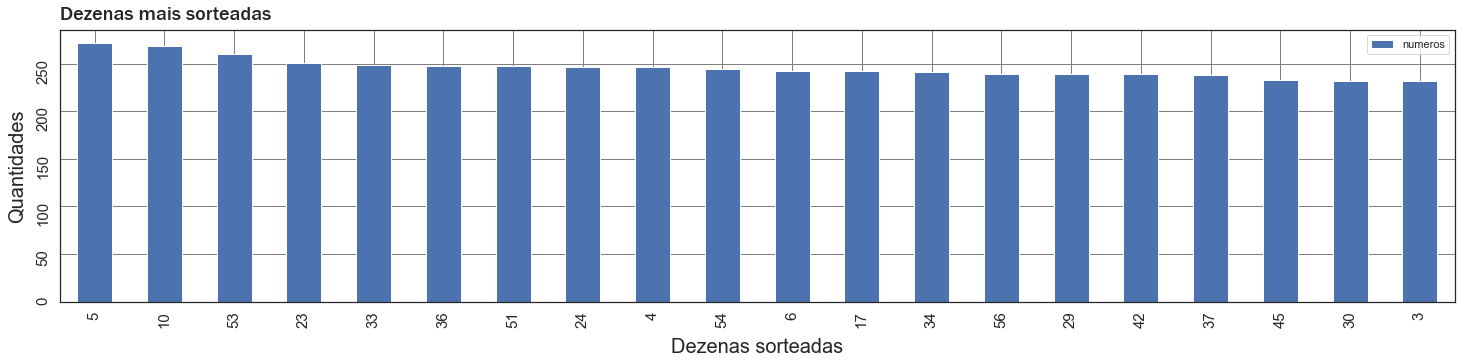

In [67]:
# Dezenas que mais foram sorteadas
Dezenas = pd.DataFrame(mega_sena['1ª Dezena'].tolist() + mega_sena['2ª Dezena'].tolist() 
+ mega_sena['3ª Dezena'].tolist() + mega_sena['4ª Dezena'].tolist() + mega_sena['5ª Dezena'].tolist() 
+ mega_sena['6ª Dezena'].tolist(), columns=['numeros'])

plt.title('Dezenas mais sorteadas', fontname = 'Franklin Gothic Medium', size = 20, loc = 'left', pad = 10)
plt.xlabel ("Dezenas sorteadas", size = 20, labelpad = 10)
plt.ylabel ("Quantidades", size = 20, labelpad =10)
plt.xticks(rotation = 90, size = 15)
plt.yticks(rotation = 90, size = 15)
Dezenas['numeros'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(25,5), fontsize=15, legend=True);
plt.grid(True, color = 'grey')

### <span style="color:DeepSkyBlue">Números que saem com mais frequencia nos sorteios desde de 1995.</span>

### <span style="color:GreenYellow">Gerando bilhetes premiados para a mega sena da virada.</span>

In [68]:
import random
from random import sample
import numpy as np

# Criar o array 3 x 3 com números aleatórios entre 1 e 60

b1 = sample(range(1, 60), 6)
b2 = sample(range(1, 60), 6)
b3 = sample(range(1, 60), 6)
b4 = sample(range(1, 60), 6)
b5 = sample(range(1, 60), 6)
b6 = sample(range(1, 60), 6)

print("Seus numeros da sorte são: ", b1)
print("Seus numeros da sorte são: ", b2)
print("Seus numeros da sorte são: ", b3)
print("Seus numeros da sorte são: ", b4)
print("Seus numeros da sorte são: ", b5)
print("Seus numeros da sorte são: ", b6)

Seus numeros da sorte são:  [37, 57, 42, 26, 34, 49]
Seus numeros da sorte são:  [59, 45, 1, 24, 46, 23]
Seus numeros da sorte são:  [40, 12, 35, 42, 36, 10]
Seus numeros da sorte são:  [36, 24, 15, 12, 31, 6]
Seus numeros da sorte são:  [39, 46, 7, 49, 56, 29]
Seus numeros da sorte são:  [8, 32, 56, 44, 45, 13]


### <span style="color:GreenYellow">OS 20 numeros mais sorteados desde 1996.</span>

In [69]:
import random
from random import sample
import numpy as np

# Criando uma listas com os numeros que mais sairam:
Lista = [5,10,53,23,33,36,51,24,4,54,6,17,34,56,29,42,37,45,30,3]

b1 = random.sample(Lista, 6)
b2 = random.sample(Lista, 6)
b3 = random.sample(Lista, 6)
b4 = random.sample(Lista, 6)
b5 = random.sample(Lista, 6)
b6 = random.sample(Lista, 6)

print("Seus numeros da sorte são: ", b1)
print("Seus numeros da sorte são: ", b2)
print("Seus numeros da sorte são: ", b3)
print("Seus numeros da sorte são: ", b4)
print("Seus numeros da sorte são: ", b5)
print("Seus numeros da sorte são: ", b6)

Seus numeros da sorte são:  [3, 53, 30, 29, 54, 56]
Seus numeros da sorte são:  [4, 36, 30, 37, 33, 3]
Seus numeros da sorte são:  [56, 30, 23, 17, 29, 24]
Seus numeros da sorte são:  [23, 5, 24, 30, 42, 33]
Seus numeros da sorte são:  [24, 51, 34, 42, 45, 36]
Seus numeros da sorte são:  [56, 42, 51, 23, 29, 4]
